# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5$$

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [57]:
# Challenge: Write the g(x) function and the dg(x) function in Python?
def g(x):
    return x ** 4 - 4 * x ** 2 + 5 

def dg(x):
    return 4 * x ** 3 - 8 * x

In [58]:
x_2 = np.linspace(-2, 2, 1000)

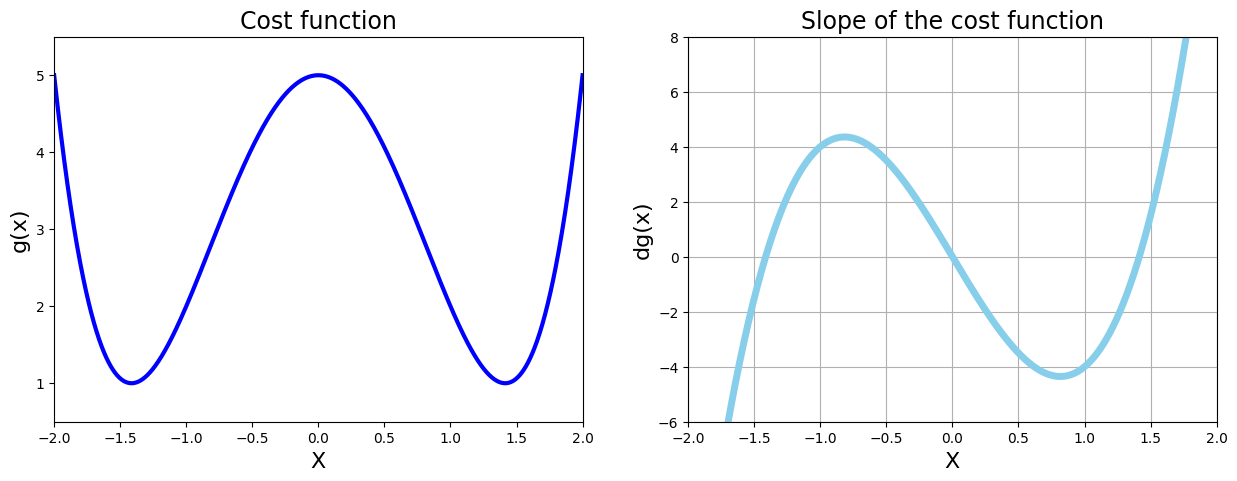

In [59]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [60]:
# Gradient Descent
def gradient_descent(derivitive_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    x_list = [initial_guess]
    slope_list = [derivitive_func(initial_guess)]

    for n in range(max_iter):
        previous_guess = initial_guess
        gradient = derivitive_func(previous_guess)
        initial_guess = previous_guess - multiplier * gradient

        step_size = abs(initial_guess - previous_guess)

        x_list.append(initial_guess)
        slope_list.append(derivitive_func(initial_guess))

        if step_size < precision:
            break
            
    return initial_guess, x_list, slope_list

In [61]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [62]:
local_min, list_x, deriv_list = gradient_descent(derivitive_func=dg, 
                                                 initial_guess=-0.5, 
                                                 multiplier=0.01, 
                                                 precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [63]:
local_min, list_x, deriv_list = gradient_descent(derivitive_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


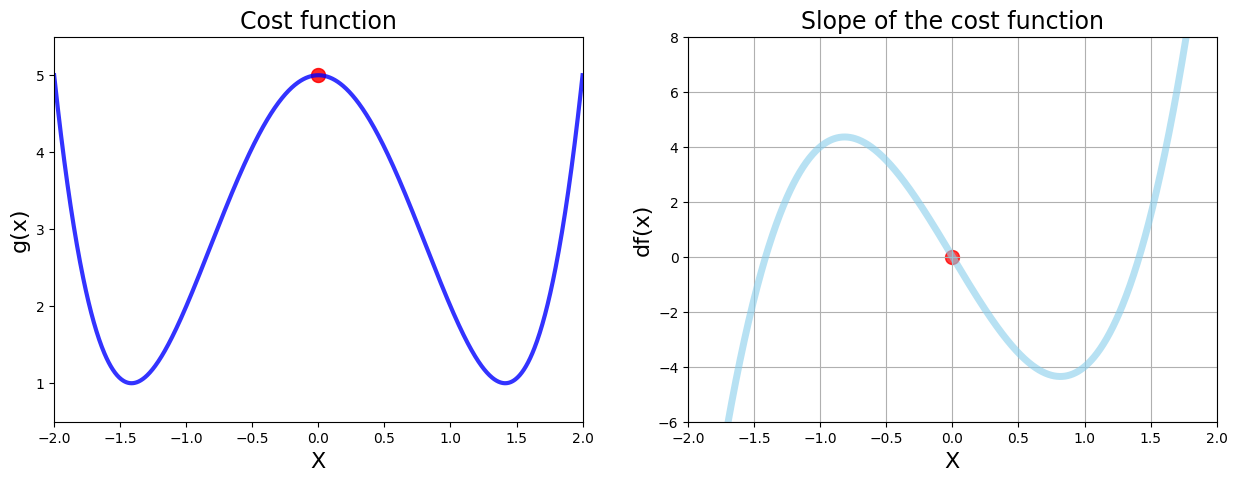

In [64]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivitive_func=dg, initial_guess=0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

## Example 3 - Divergence, Overflow, and Python Tuples
## $$h(x) = x^5 -2x^4 +2$$

In [65]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

In [66]:
def h(x):
    return x**5 - 2*x**4 + 2

In [67]:
def dh(x):
    return 5*x**4 - 8*x**3

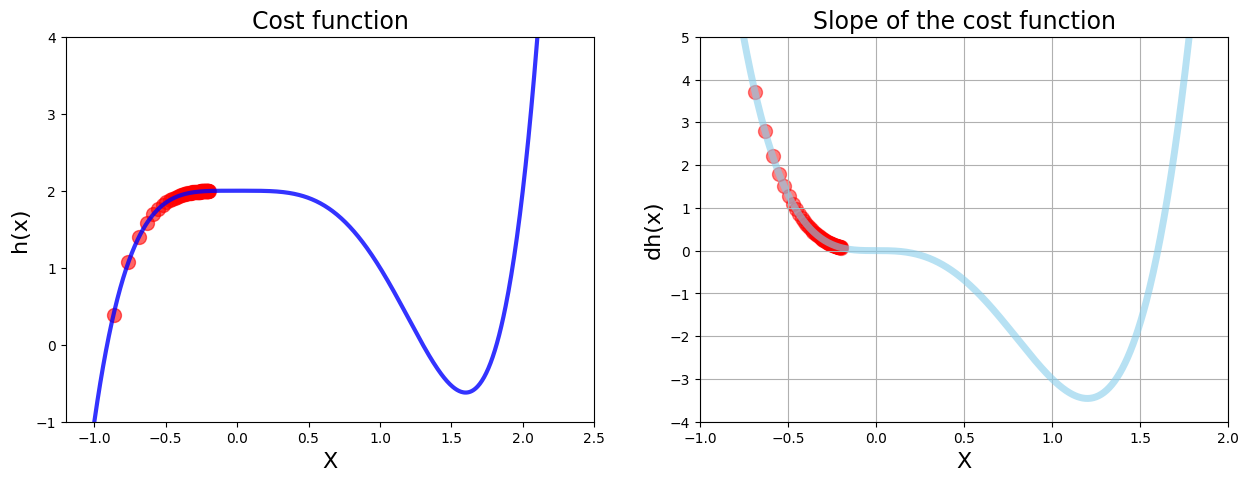

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [68]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivitive_func=dh, initial_guess=-0.2, max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [69]:
import sys
sys.float_info.max

1.7976931348623157e+308

## The Learning Rate

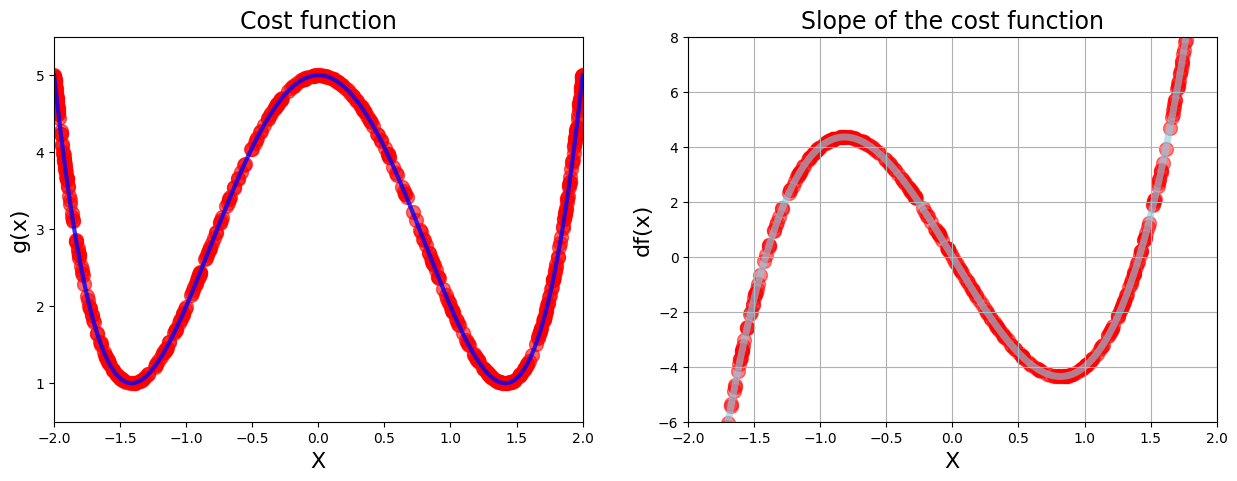

Number of steps:  501


In [70]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivitive_func=dg, initial_guess=1.9, multiplier=0.25, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps: ', len(list_x))


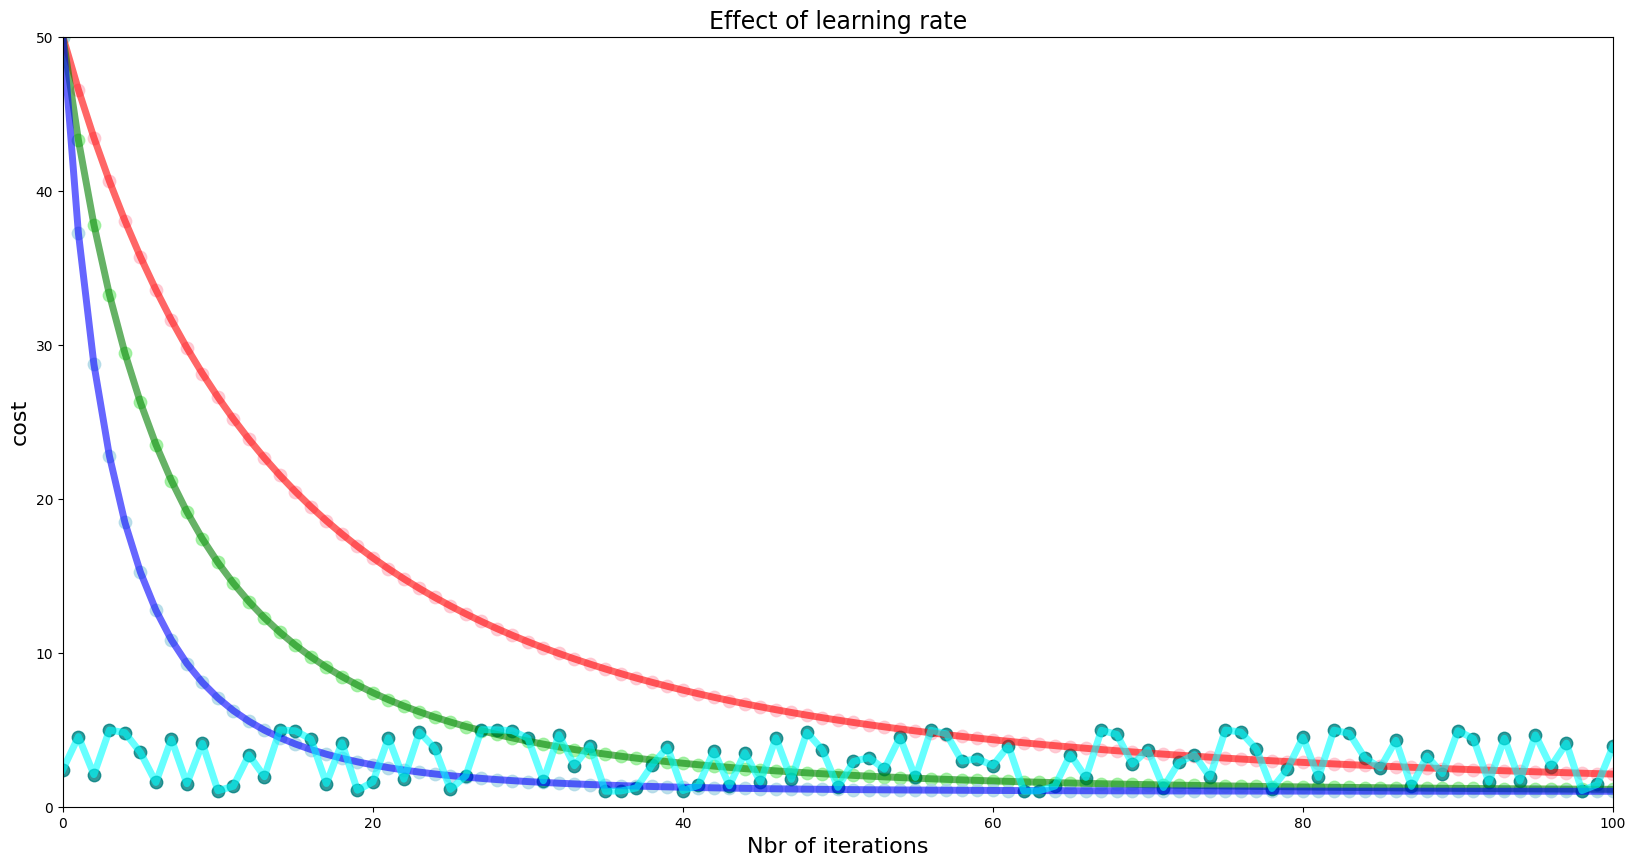

In [71]:
# Run gradient descent 3 times
n=100

low_gamma = gradient_descent(derivitive_func=dg, initial_guess=3, 
                                                 multiplier=0.0005, precision=0.0001, 
                                                 max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
mid_gamma = gradient_descent(derivitive_func=dg, initial_guess=3, 
                                                 multiplier=0.001, precision=0.0001, 
                                                 max_iter=n)

high_gamma = gradient_descent(derivitive_func=dg, initial_guess=3, 
                                                 multiplier=0.002, precision=0.0001, 
                                                 max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivitive_func=dg, initial_guess=.9, 
                                                 multiplier=0.25, precision=0.0001, 
                                                 max_iter=n)

# Plotting reduction in cose for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('Nbr of iterations', fontsize=16)
plt.ylabel('cost', fontsize=16)

# Values for the charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

#2 X Axis Data: Create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='red', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(low_values)), color='pink', s=80, alpha=0.8)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='green', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(mid_values)), color='lightgreen', s=80, alpha=0.8)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='blue', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(high_values)), color='lightblue', s=80, alpha=0.8)

# Plotting insane learning rate
plt.plot(iteration_list, g(insane_values), color='cyan', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(insane_values)), color='teal', s=80, alpha=0.8)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [72]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [73]:
# make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

Shape of X array (200,)


Array after meshgrid:  (200, 200)


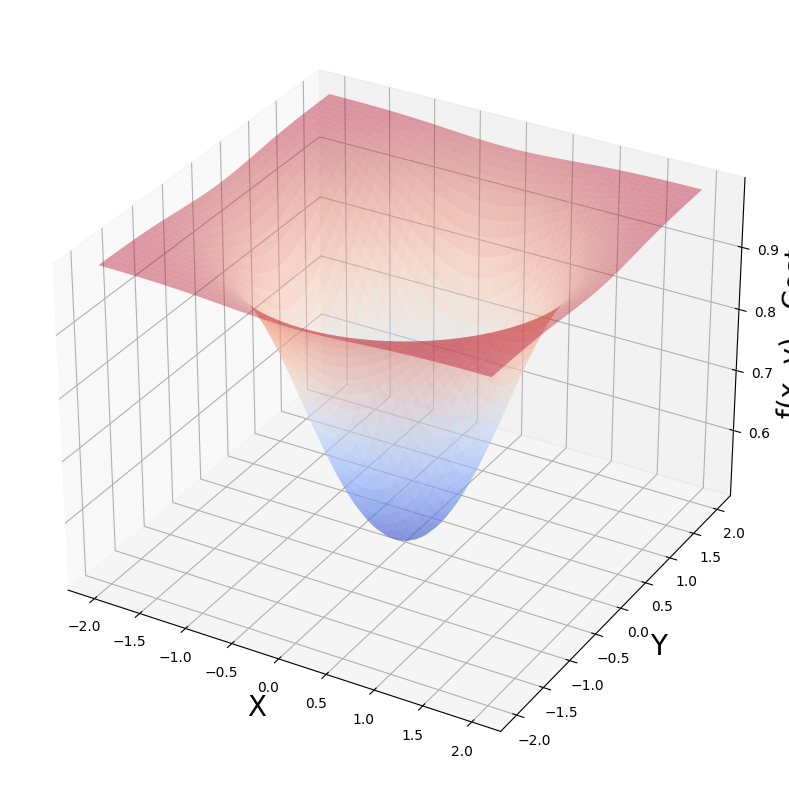

In [74]:
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

# Generating 3D plot
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

In [75]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.9, y=1.0 is: ', f(a, b).evalf(subs={a:1.8,b:1.0}))
print('value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.9, y=1.0 is:  0.990604794032582
value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy


In [76]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    # work out the slope
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y\ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [77]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


In [78]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [79]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [80]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


In [81]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]',hs_band[0])
print('hs_band[1][0]',hs_band[1][0])

the_root = np.append(arr=hs_band, values=kirk, axis=0)
print(the_root)
print('Printing nicknames...', the_root[:,0])

the_root = np.append(arr=hs_band, values=[['Malik B', 'MC']], axis=0)
print(the_root)

print('Printing band roles...', the_root[:,1])


(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[1][0] Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Malik B' 'MC']]
Printing band roles... ['MC' 'Drums' 'MC']


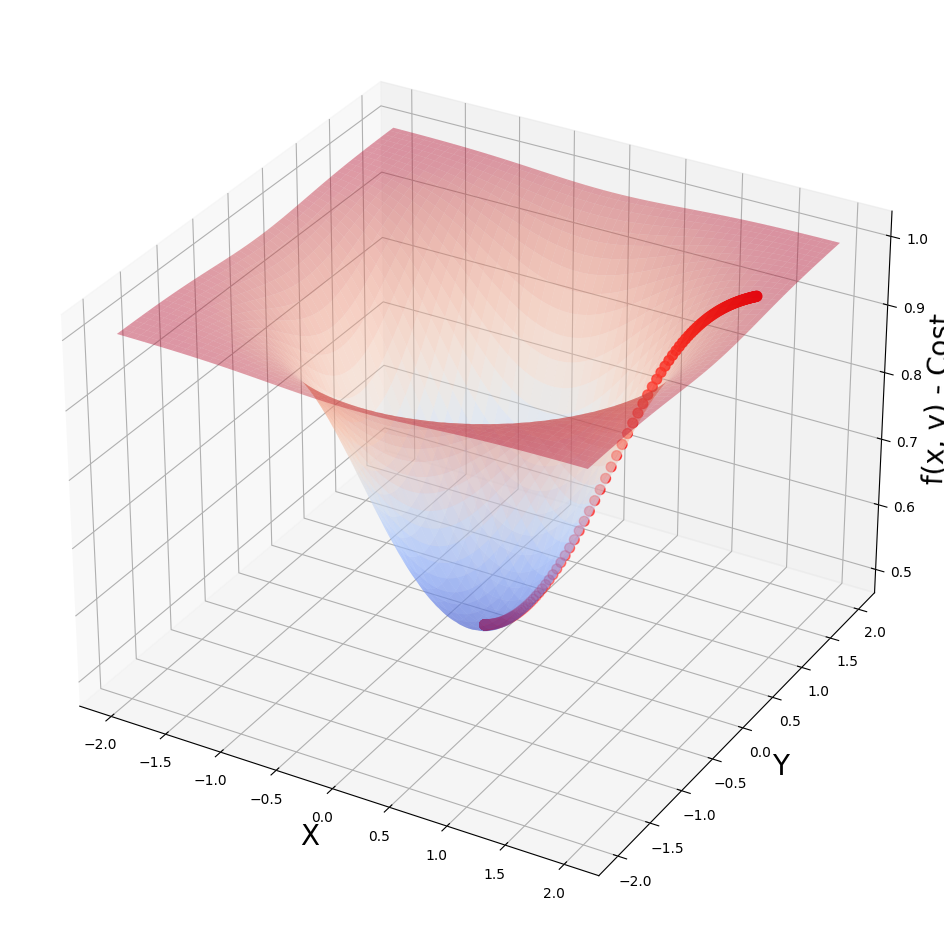

In [82]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 5 - Working with Data & Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [83]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [84]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591


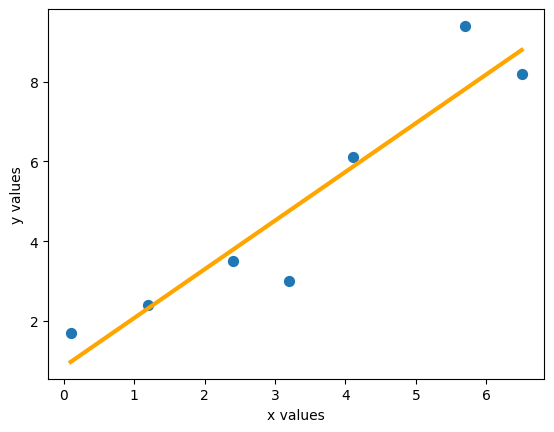

In [85]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [86]:
# y_hat = theta0 + theta1*x
y_hat = regr.intercept_[0] + regr.coef_[0][0]*x_5
print('Est Values y_hat: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est Values y_hat: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [87]:
def mse(y, y_hat):
    return mean_squared_error(y, y_hat)
    

print('The Mean Square Error is: ', mse(y_5, y_hat))

The Mean Square Error is:  0.9479655759794575


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [88]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [89]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [90]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


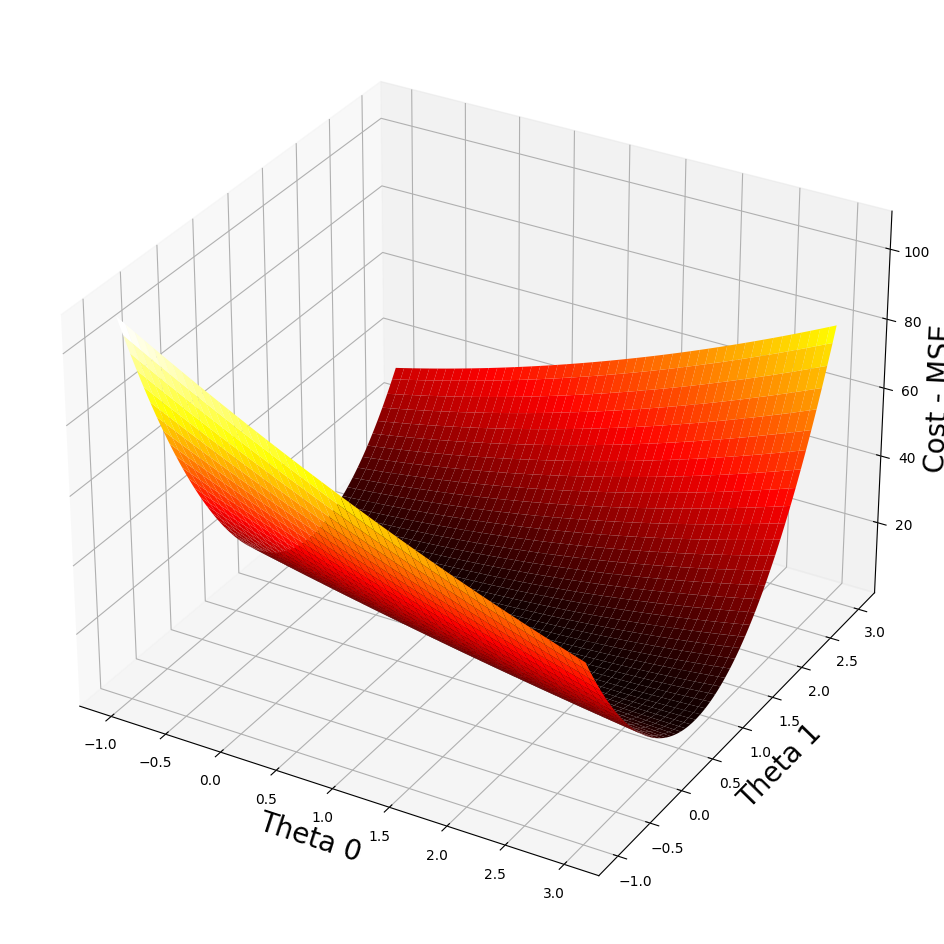

In [91]:
# Plot the MSE
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [92]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n}\sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n}\sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)\big( x^{(i)} \big)$$

In [93]:
# values, y values, arracy of theta parameters (theta0 at index 0 and theta1 at 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, value=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [96]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatetr plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to out numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: 0.9479751138321334


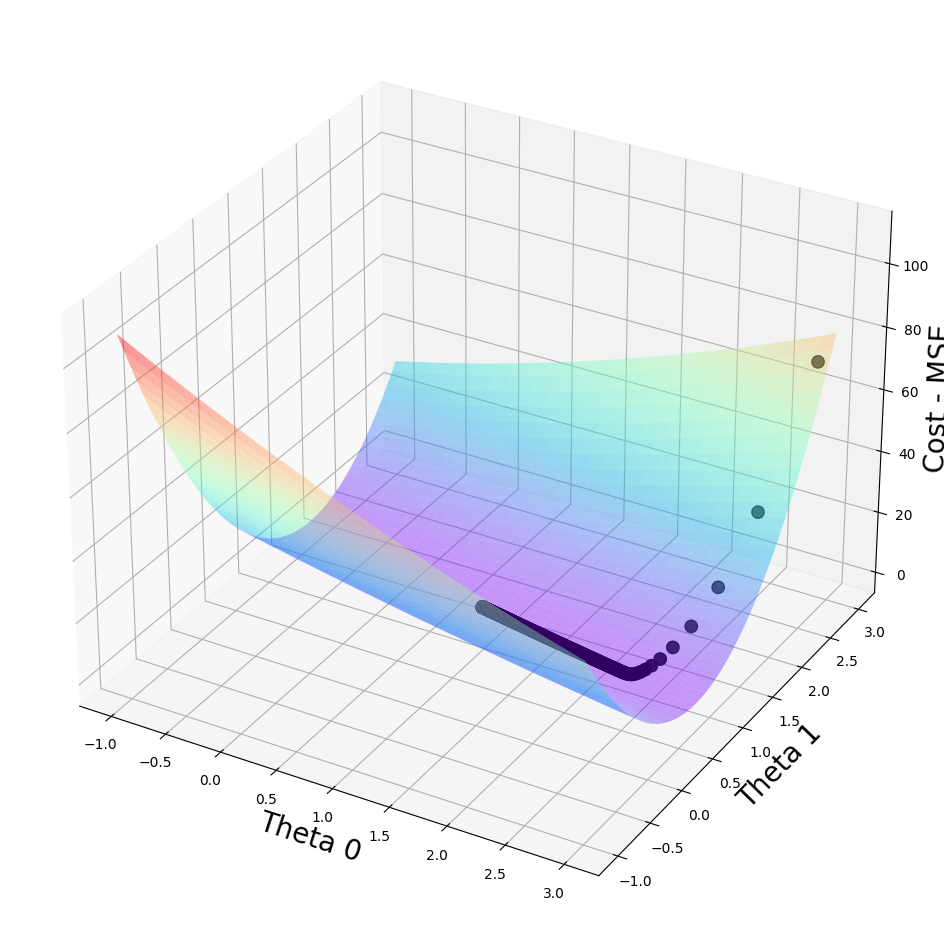

In [102]:
# Plot the MSE
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()